統計Web step1. 基礎編

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
math.perm(6, 4)

360

In [3]:
math.log2(47)

5.554588851677638

ローレンツ曲線

<Axes: xlabel='x'>

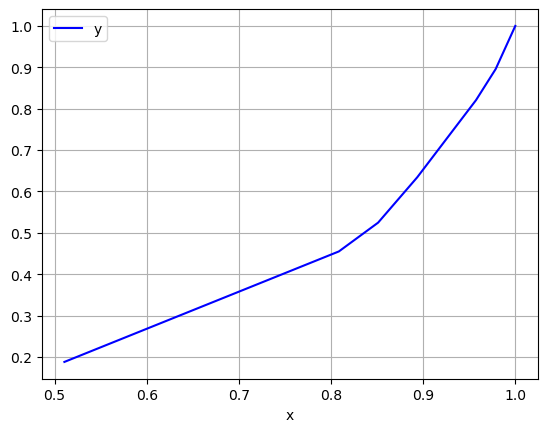

In [4]:
# データを辞書形式で作成
data = {
    'x': [0.5106, 0.8085, 0.8511, 0.8936, 0.9574, 0.9787, 0.9787, 1],
    'y': [0.188, 0.455, 0.5246, 0.6343, 0.8208, 0.8958, 0.8958, 1]
}

# データフレームを作成
df = pd.DataFrame(data)

df.plot(x='x', y='y', color='blue', grid=True)

<Axes: xlabel='x'>

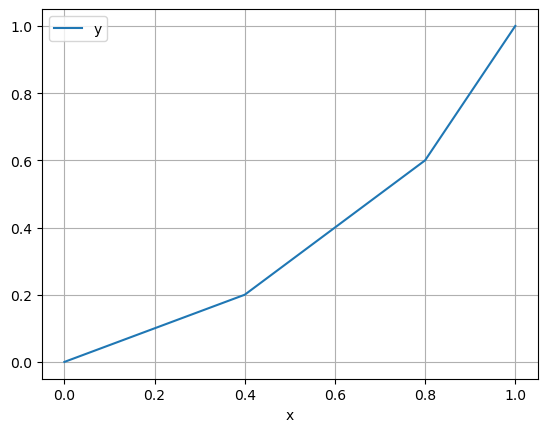

In [5]:
# データを辞書形式で作成
data = {
    'x': [0, 0.4, 0.8, 1],
    'y': [0, 0.2, 0.6, 1]
}

# データフレームを作成
df = pd.DataFrame(data)

df.plot(x='x', y='y', grid=True)

In [6]:
10 ** 0.5

3.1622776601683795

In [7]:
128 ** (1/2)

11.313708498984761

In [8]:
(1.2*1.1*1.15)**(1/3)

1.1492749052302107

In [9]:
list = pd.Series([64,73,63,68,44,59,61,42,57,70,
                  56,64,53,66,48,48,51,54,54,73,
                  51,44,83,74,47,57,41,45,60,72,
                  77,69,72,62,78,58,64,61,52,61,
                  45,66,58,60,54,71,57,52,54,73])

In [10]:
list.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: None
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 532.0 bytes


In [11]:
print(list.mean())
print(list.median())
print(list.mode())

59.72
59.5
0    54
dtype: int64


In [12]:
list.value_counts()[54]

4

In [13]:
(0.987*1*1.017*1.015*1.022)**(1/5)

1.008117163331727

## 4. 箱ひげ図と幹葉表示

In [14]:
list = pd.Series([52, 55, 65, 80, 73, 
                  63, 68, 59, 60, 57, 
                  61, 77, 79, 54, 110])

In [15]:
sorted = list.sort_values()
sorted

0      52
13     54
1      55
9      57
7      59
8      60
10     61
5      63
2      65
6      68
4      73
11     77
12     79
3      80
14    110
dtype: int64

In [16]:
Q1 = list.quantile(0.25)
Q2 = list.quantile(0.5)  # 中央値が第2四分位数に相当
Q3 = list.quantile(0.75)

print("第1四分位数 (Q1):", Q1)
print("第2四分位数 (Q2, 中央値):", Q2)
print("第3四分位数 (Q3):", Q3)

第1四分位数 (Q1): 58.0
第2四分位数 (Q2, 中央値): 63.0
第3四分位数 (Q3): 75.0


4-4. 箱ひげ図の書き方(データ数が奇数の場合)

In [17]:
data = pd.Series([52, 55, 65, 80, 73, 
                  63, 68, 59, 60, 57, 
                  61, 77, 79, 54, 110])

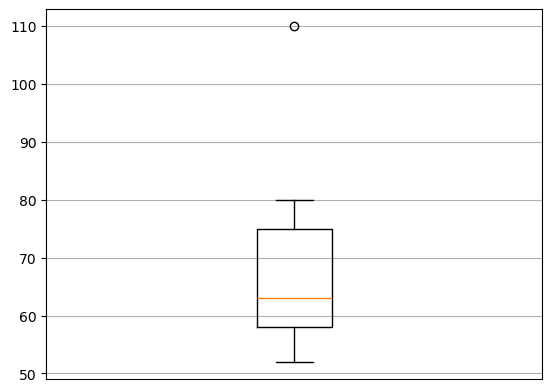

In [18]:
plt.boxplot(data)
plt.grid(True)
plt.xticks([], []);


In [19]:
Q1, Q2, Q3 = data.quantile([0.25, 0.5, 0.75])
print(Q1)
print(Q2)
print(Q3)

58.0
63.0
75.0


4-5. 箱ひげ図の書き方(データ数が偶数の場合)

In [20]:
data2 = pd.Series([52, 55, 65, 80, 73, 
                  63, 68, 59, 60, 57, 
                  61, 77, 79, 54])

In [21]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

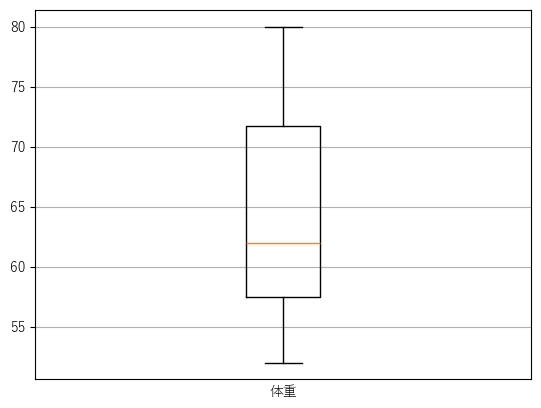

In [22]:
plt.boxplot(data2)
plt.grid(True)
plt.xlabel('体重')
plt.xticks([], []);

In [23]:
Q1, Q2, Q3 = data2.quantile([0.25, 0.5, 0.75])
print(Q1)
print(Q2)
print(Q3)

57.5
62.0
71.75


In [24]:
data = pd.Series([56, 48, 78, 81, 86, 
                  71, 72, 88, 46, 47, 
                  89, 58, 43, 79, 48, 41])

In [25]:
sorted = np.sort(data)
sorted

array([41, 43, 46, 47, 48, 48, 56, 58, 71, 72, 78, 79, 81, 86, 88, 89],
      dtype=int64)

In [26]:
sorted[7:9]

array([58, 71], dtype=int64)

In [27]:
Q1, Q2, Q3 = data.quantile([0.25, 0.5, 0.75])
print(Q1)
print(Q2)
print(Q3)
print(Q3-Q1)

47.75
64.5
79.5
31.75


幹葉表示

In [28]:
data = [41, 43.5, 46.9, 56.9, 58.8, 71.4, 78.2, 86.6, 88.5, 89.3]

# 幹と葉に分ける
stems = [int(d) // 10 for d in data]
leaves = [int(d) % 10 for d in data]

# 幹葉表示を作成
stem_leaf = {}
for stem, leaf in zip(stems, leaves):
    if stem not in stem_leaf:
        stem_leaf[stem] = []
    stem_leaf[stem].append(leaf)

# 幹葉表示を出力
for stem in stem_leaf.keys():
    print(f"{stem}: {' '.join(map(str, stem_leaf[stem]))}")

4: 1 3 6
5: 6 8
7: 1 8
8: 6 8 9


## 6. 分散と標準偏差

In [29]:
data_a = pd.Series([1, 2, 3, 4, 5, 6])
data_b = pd.Series([3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [30]:
print(data_a.mean())
print(data_b.mean())
print(data_a.var())
print(data_b.var())
print(data_a.std())
print(data_b.std())

3.5
3.5
3.5
0.0
1.8708286933869707
0.0


In [31]:
v = ((data_a - data_a.mean()) ** 2).sum() / len(data_a)

v

2.9166666666666665

In [32]:
dm = pd.Series([169, 163, 189, 172, 170, 168, 175, 164, 183, 178])
df = pd.Series([153, 160, 158, 157, 148, 163, 165, 155, 152, 157])

In [33]:
print(dm.std())
print(df.std())

8.279157230325104
5.116422361159971


In [34]:
print(7.9/173.1)
print(0.89 / 6.78)

0.04563835932986713
0.13126843657817108


In [35]:
math.factorial(6)

720

In [36]:
math.perm(6, 6)

720

In [37]:
math.perm(4, 4) / 4

6.0

In [39]:
120/(2**10)

0.1171875

In [40]:
(199/200)** 9 *(1/200)*10

0.04779447891787798

In [41]:
1/math.exp(5)

0.006737946999085467

In [42]:
0.4*0.998**199

0.26855776101716333

In [44]:
math.exp(-4/10)*0.4

0.26812801841425576

In [45]:
2.71828**0.4

1.4918242962493493

In [46]:
math.comb(10,6)*(1/6)**6*(5/6)**4

0.002170635034039526

In [47]:
16308/100000

0.16308

In [50]:
math.exp(-2.5)*(2.5)**5/math.factorial(5)

0.06680094289054264

In [51]:
math.exp(-2)*8/6

0.1804470443154836

In [57]:
(200/3)/math.sqrt(160000/9)

0.5

In [59]:
math.exp(-2)

0.1353352832366127

In [61]:
3**(-2)

0.1111111111111111

In [62]:
data = pd.Series([7, 6.2, 8.3, 10, 9.1, 6.8, 7.4, 8.5, 9.2, 7.9])

In [68]:
mu = data.mean()
mu

8.040000000000001

In [66]:
v = data.var()
v

1.4471111111111106

In [67]:
v*10/9

1.6079012345679007

In [72]:
h= data - mu
h

0   -1.04
1   -1.84
2    0.26
3    1.96
4    1.06
5   -1.24
6   -0.64
7    0.46
8    1.16
9   -0.14
dtype: float64

In [73]:
h2 = h**2
h2

0    1.0816
1    3.3856
2    0.0676
3    3.8416
4    1.1236
5    1.5376
6    0.4096
7    0.2116
8    1.3456
9    0.0196
dtype: float64

In [75]:
h2.sum()*1/9

1.4471111111111106